In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
wine=pd.read_csv('/home/anu/Downloads/winequalityN.csv')
wine.head()
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [3]:
wine.shape

(6497, 13)

In [4]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
#replace nan with mean
for col,value in wine.items():
    if col!='type':
        wine[col]=wine[col].fillna(wine[col].mean())

In [6]:
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine.duplicated().sum()

1168

In [8]:
wine.drop_duplicates(keep='first',inplace=True)
count_cat=wine.nunique()
count_cat

type                      2
fixed acidity           107
volatile acidity        188
citric acid              90
residual sugar          317
chlorides               215
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      109
sulphates               112
alcohol                 111
quality                   7
dtype: int64

In [9]:
#imbalancing avoiding

dis=wine['type'].value_counts(normalize=True)
dis

white    0.74498
red      0.25502
Name: type, dtype: float64

<AxesSubplot:xlabel='type', ylabel='count'>

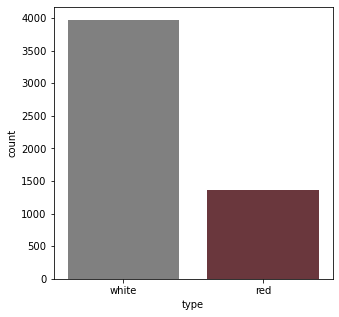

In [10]:
#EDA

plt.figure(figsize=(5,5))
sns.countplot(x=wine['type'],palette=['#808080','#722F37'])


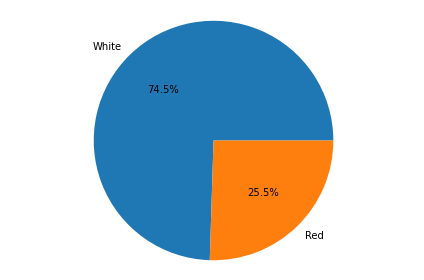

In [11]:
labels=['White','Red']
sizes=[wine['type'].value_counts()[0],wine['type'].value_counts()[1]]
fig1,ax1=plt.subplots()
ax1.pie(sizes,labels=labels,autopct='%1.1f%%')
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [12]:
encoder=LabelEncoder()
encoder.fit(wine['type'])
list(encoder.classes_)
wine['class']=wine['type']
wine['type']=encoder.transform(wine['type'])

<AxesSubplot:>

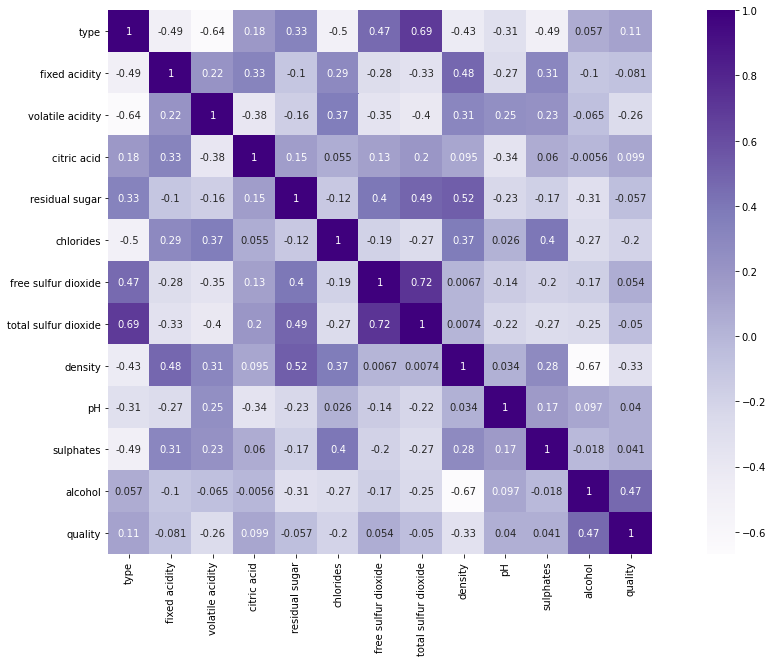

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(wine.corr(),square=True,annot=True,cmap='Purples')

<AxesSubplot:xlabel='free sulfur dioxide_log', ylabel='Density'>

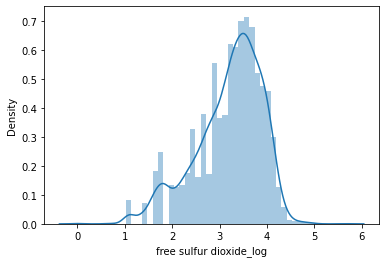

In [14]:
wine['free sulfur dioxide_log']=np.log(wine['free sulfur dioxide'])
sns.distplot(wine['free sulfur dioxide_log'])

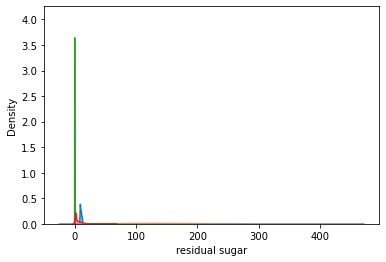

In [15]:
for i in ['alcohol','total sulfur dioxide','volatile acidity','residual sugar']:
    sns.distplot(wine[i])

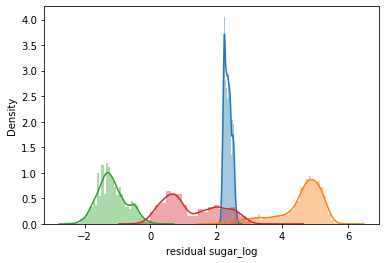

In [16]:
for i in ['alcohol','total sulfur dioxide','volatile acidity','residual sugar']:
    wine[i+'_log']=np.log(wine[i])
    sns.distplot(wine[i+'_log'])

In [17]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class,free sulfur dioxide_log,alcohol_log,total sulfur dioxide_log,volatile acidity_log,residual sugar_log
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,3.806662,2.174752,5.135798,-1.309333,3.030134
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,2.639057,2.251292,4.882802,-1.203973,0.470004
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,3.401197,2.312535,4.574711,-1.272966,1.931521
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,3.850148,2.292535,5.225747,-1.469676,2.140066
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white,3.401197,2.261763,4.912655,-1.139434,1.945910


In [18]:
col=['residual sugar','alcohol','free sulfur dioxide','volatile acidity','total sulfur dioxide']
wine=wine.drop(columns=col,axis=1)
wine.head()

,type,fixed acidity,citric acid,chlorides,density,pH,sulphates,quality,class,free sulfur dioxide_log,alcohol_log,total sulfur dioxide_log,volatile acidity_log,residual sugar_log
0,1,7.0,0.36,0.045,1.0010,3.00,0.45,6,white,3.806662,2.174752,5.135798,-1.309333,3.030134
1,1,6.3,0.34,0.049,0.9940,3.30,0.49,6,white,2.639057,2.251292,4.882802,-1.203973,0.470004
2,1,8.1,0.40,0.050,0.9951,3.26,0.44,6,white,3.401197,2.312535,4.574711,-1.272966,1.931521
3,1,7.2,0.32,0.058,0.9956,3.19,0.40,6,white,3.850148,2.292535,5.225747,-1.469676,2.140066
6,1,6.2,0.16,0.045,0.9949,3.18,0.47,6,white,3.401197,2.261763,4.912655,-1.139434,1.945910


<AxesSubplot:>

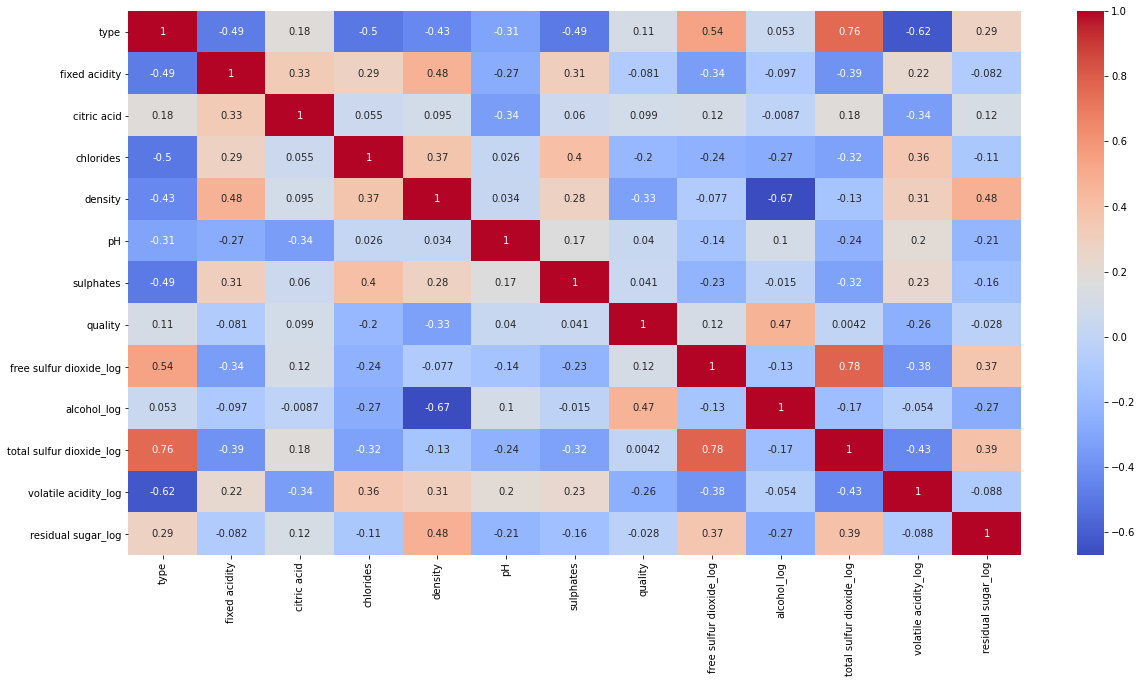

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(wine.corr(),annot=True,cmap='coolwarm')

<AxesSubplot:xlabel='quality', ylabel='count'>

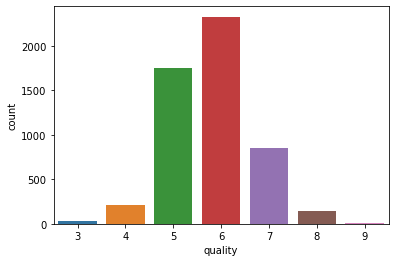

In [20]:
sns.countplot(wine['quality'])


In [21]:
x=wine.drop(columns=['type','quality','class'])
y=wine['type']

In [22]:
y.value_counts()

1    3970
0    1359
Name: type, dtype: int64

In [23]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=4)
x,y=oversample.fit_resample(x,y)
y.value_counts()

0    3970
1    3970
Name: type, dtype: int64

In [24]:
#pip install pyforest==0.1.1

In [25]:
from sklearn.model_selection import cross_val_score,train_test_split
def classify(model,x,y):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=34)
    L=model()
    L.fit(xtrain,ytrain)
    print('Accuracy of %s'%i,L.score(xtest,ytest)*100)
    score=cross_val_score(L,x,y,cv=5)
    print('CV score %s'%i,np.mean(score)*100)
    print()

In [29]:
import pyforest
pyforest.__version__

'0.1.1'

# pyforest is not working for me

In [30]:
from pyforest import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

est=[LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier]
for i in est:
    classify(i,x,y)

Accuracy of <class 'sklearn.linear_model._logistic.LogisticRegression'> 98.1360201511335
CV score <class 'sklearn.linear_model._logistic.LogisticRegression'> 98.5264483627204

Accuracy of <class 'sklearn.tree._classes.DecisionTreeClassifier'> 97.98488664987406
CV score <class 'sklearn.tree._classes.DecisionTreeClassifier'> 98.37531486146094

Accuracy of <class 'sklearn.ensemble._forest.RandomForestClassifier'> 99.64735516372795
CV score <class 'sklearn.ensemble._forest.RandomForestClassifier'> 99.5088161209068

[14:52:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of <class 'xgboost.sklearn.XGBClassifier'> 99.7984886649874
[14:52:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'e